In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [3]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 103,2.25,6367.0,3534.0,Built Up area: 3534 (328.32 sq.m.)Carpet area:...,3,5,3+,...,NaN,3534.0,2000.00,0,0,0,0,0,2,0
1,flat,vatika emilia floors,sector 83,0.65,6190.0,1050.0,Super Built up area 1050(97.55 sq.m.)Built Up ...,2,2,2,...,1050.0,950.0,850.00,0,0,0,0,0,1,174
2,flat,paras dews,sector 106,1.25,10656.0,1173.0,Super Built up area 1900(176.52 sq.m.)Built Up...,3,4,3,...,1900.0,1305.0,1173.00,1,1,0,0,0,2,167
3,flat,emaar gurgaon greens,sector 102,1.30,7878.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,3,3,...,1650.0,NaN,1022.58,0,1,0,0,0,1,125
4,house,signature global city,sector 37d,1.27,8089.0,1570.0,Plot area 1570(145.86 sq.m.),3,3,3,...,NaN,1570.0,NaN,0,0,0,1,0,2,89


In [4]:
df.shape

(3802, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3802 entries, 0 to 3801
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3802 non-null   object 
 1   society              3801 non-null   object 
 2   sector               3802 non-null   object 
 3   price                3784 non-null   float64
 4   price_per_sqft       3784 non-null   float64
 5   area                 3784 non-null   float64
 6   areaWithType         3802 non-null   object 
 7   bedRoom              3802 non-null   int64  
 8   bathroom             3802 non-null   int64  
 9   balcony              3802 non-null   object 
 10  floorNum             3783 non-null   float64
 11  facing               2697 non-null   object 
 12  agePossession        3802 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1943 non-null   f

In [6]:
df.duplicated().sum()

124

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(3678, 23)

# 1. Property Type

<Axes: xlabel='property_type'>

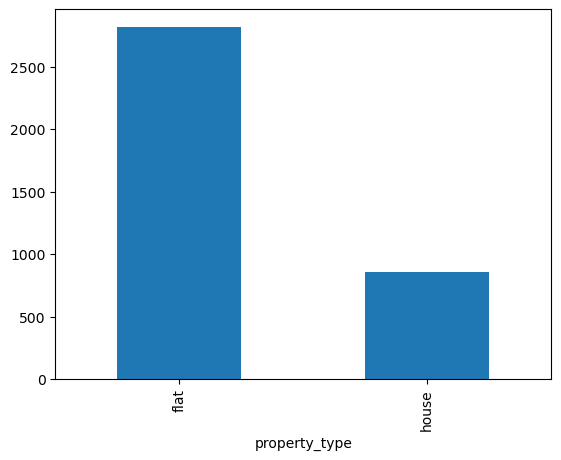

In [9]:
df['property_type'].value_counts().plot(kind= 'bar')

### Observations

  #### . Flats are in majority(75 percent) and there are less number of houses(~25 percent)
  #### . No missing values

# 2.Society 

In [10]:
df['society'].value_counts().shape

(699,)

In [11]:
df['society'].value_counts()

society
independent                             486
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     38
                                       ... 
park view apartments                      1
millenia                                  1
rwa                                       1
aditya apartment                          1
bhim nagar, sector 6                      1
Name: count, Length: 699, dtype: int64

In [12]:
df[df['society'] != 'independent']['society'].value_counts(normalize= True).cumsum().head(75)
# out of 699, top 75 apartments gives us 50 % of our data

society
tulip violet                            0.023504
ss the leaf                             0.046380
shapoorji pallonji joyville gurugram    0.059542
dlf new town heights                    0.071451
signature global park                   0.082106
                                          ...   
indiabulls enigma                       0.485114
umang winter hills                      0.489188
ramsons kshitij                         0.493262
unitech uniworld resorts                0.497023
mvn athens                              0.500783
Name: proportion, Length: 75, dtype: float64

In [13]:
society_counts = df['society'].value_counts()

In [14]:
# Freq distribution for societies
frequency_bins = {
    'Very High (>100)': (society_counts > 100).sum(),
    'High(50-100)': ((society_counts >= 50) & (society_counts <= 100)).sum(),
    'Average(10-49)':  ((society_counts >= 10) & (society_counts <= 49)).sum(),
    'Low(2-9)':  ((society_counts >= 2) & (society_counts <= 9)).sum(),
    'Very Low(1)': (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High(50-100)': 2,
 'Average(10-49)': 92,
 'Low(2-9)': 277,
 'Very Low(1)': 327}

<Axes: xlabel='society'>

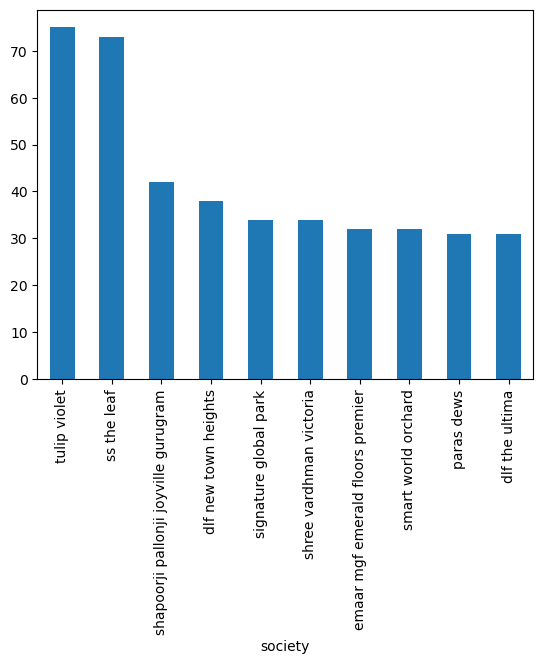

In [15]:
#top 10 societies
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind = 'bar')

In [16]:
df['society'].isnull().sum()

1

In [17]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2268,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,No,...,NaN,1625.0,NaN,0,0,0,0,0,2,0


## Observstions

#### . Around 13% properties comes under independent tag.
#### . There are 699 Societies.
#### . The top 75 socities have 50 percent of the properties and the rest 50 percent of te properties come under the remaining societies

    . Very high(>100): Only 1 society has more than 100 listings.
    . High (50-100): 2 socities have between 50 to 100 listings.
    . Average (10-49): 92 socities fall in this range with 10 to 49 listings each.
    . Low (2-9): 277 socities have between 2 to 9 listings.
    . very low(1): A significant number, 327 socities

# sector

In [18]:
# Uniue sectors
df['sector'].value_counts().shape

(115,)

<Axes: xlabel='sector'>

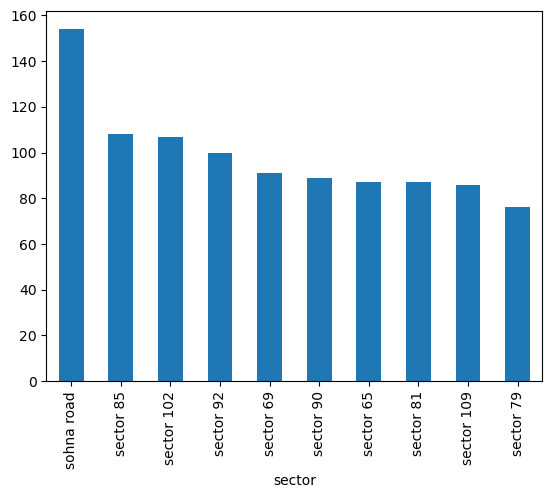

In [19]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind= 'bar')

In [20]:
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    'Very High (>100)': (sector_counts > 100).sum(),
    'High(50-100)': ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    'Average(10-49)':  ((sector_counts >= 10) & (sector_counts <= 49)).sum(),
    'Low(2-9)':  ((sector_counts >= 2) & (sector_counts <= 9)).sum(),
    'Very Low(1)': (sector_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High(50-100)': 2,
 'Average(10-49)': 92,
 'Low(2-9)': 277,
 'Very Low(1)': 327}

# Observations
  ##### .Around 13% properties comes under independent tag.
  ##### .There are 675 societies.
  ##### .The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties         come under the remaining 600 societies
  ##### .Very High (>100): Only 1 society has more than 100 listings.
  ##### .High (50-100): 2 societies have between 50 to 100 listings.
  ##### .Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
  ##### .Low (2-9): 273 societies have between 2 to 9 listings.
  ##### .Very Low (1): A significant number, 308 societies, have only 1 listing.
  ##### .1 missing value

# price

In [21]:
df['price'].isnull().sum()

17

In [22]:
 df['price'].describe()

count    3661.000000
mean        2.558902
std         3.160348
min         0.070000
25%         0.950000
50%         1.530000
75%         2.750000
max        50.000000
Name: price, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

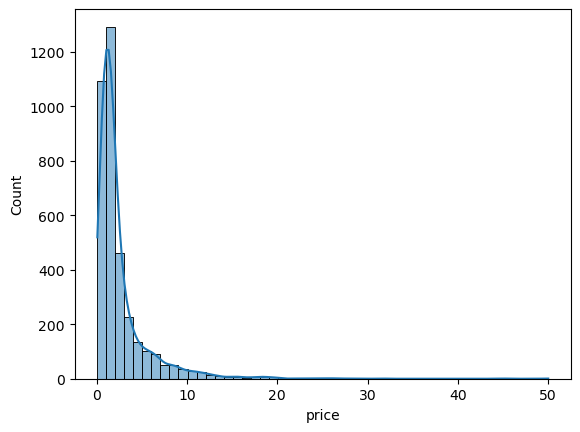

In [23]:
sns.histplot(df['price'], kde= True, bins = 50) # --> Explain there is skewness

<Axes: xlabel='price'>

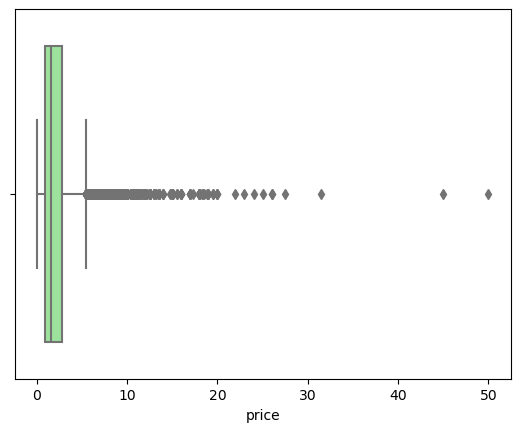

In [24]:
sns.boxplot(x = df['price'], color = 'lightgreen')

### Descriptive Statistics:
    .
Count: There are 3,660 non-missing price entries    ..
Mean Price: The average price is approximately 2.53 crore    .s.
Median Price: The median (or 50th percentile) price is 1.52 cror    .es.
Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in      the pri    .ces.
Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 cr    .ores.
IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 c### rores.
Visualiza    .tions:

Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 1    .0 crores.
Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the    . box plot.
Missing Values: There are 17 missing values in the price column.

In [25]:
# skewness and kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness, kurtosis)

4.315796561495535 33.89450569923338


 **Skewness** : The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.


__
Kurtos__is: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [26]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.25
0.05     0.37
0.95     8.50
0.99    15.70
Name: price, dtype: float64

Quantile Analysis:

    - 1% Quantile: Only 1% of properties are priced below 0.25 crores.
    - 5% Quantile: 5% of properties are priced below 0.37 crores.
    - 95% Quantile: 95% of properties are priced below 8.5 crores.
    - 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [27]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']

IQR = Q3 - Q1

IQR

1.8

In [28]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [29]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(427, 23)

In [30]:
outliers['price'].describe()

count    427.000000
mean       9.414848
std        4.829067
min        5.460000
25%        6.480000
50%        8.000000
75%       10.775000
max       50.000000
Name: price, dtype: float64

<Axes: xlabel='price'>

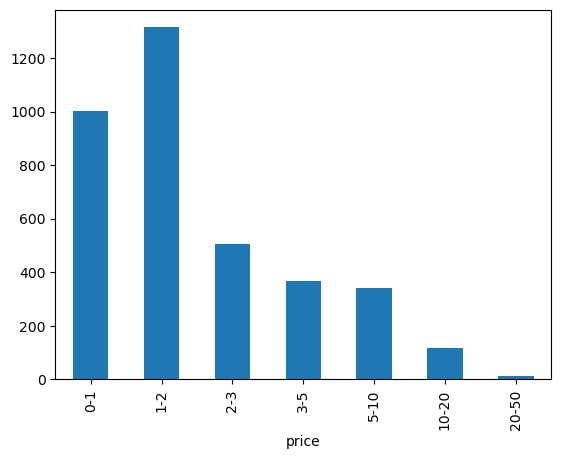

In [31]:
#price binning 
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ['0-1', '1-2', '2-3', '3-5', '5-10', '10-20', '20-50']
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

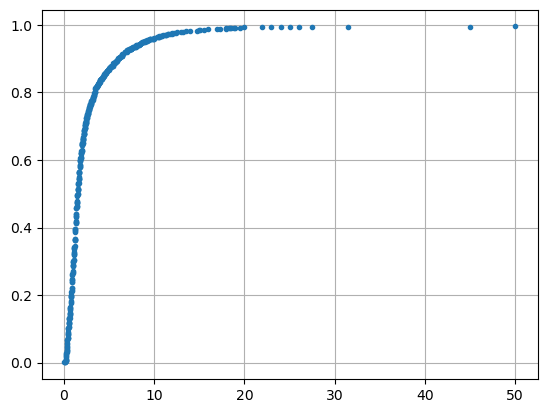

In [32]:
#ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum()/len(df['price'])
plt.plot(ecdf.index, ecdf, marker = '.', linestyle = 'none')
plt.grid()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


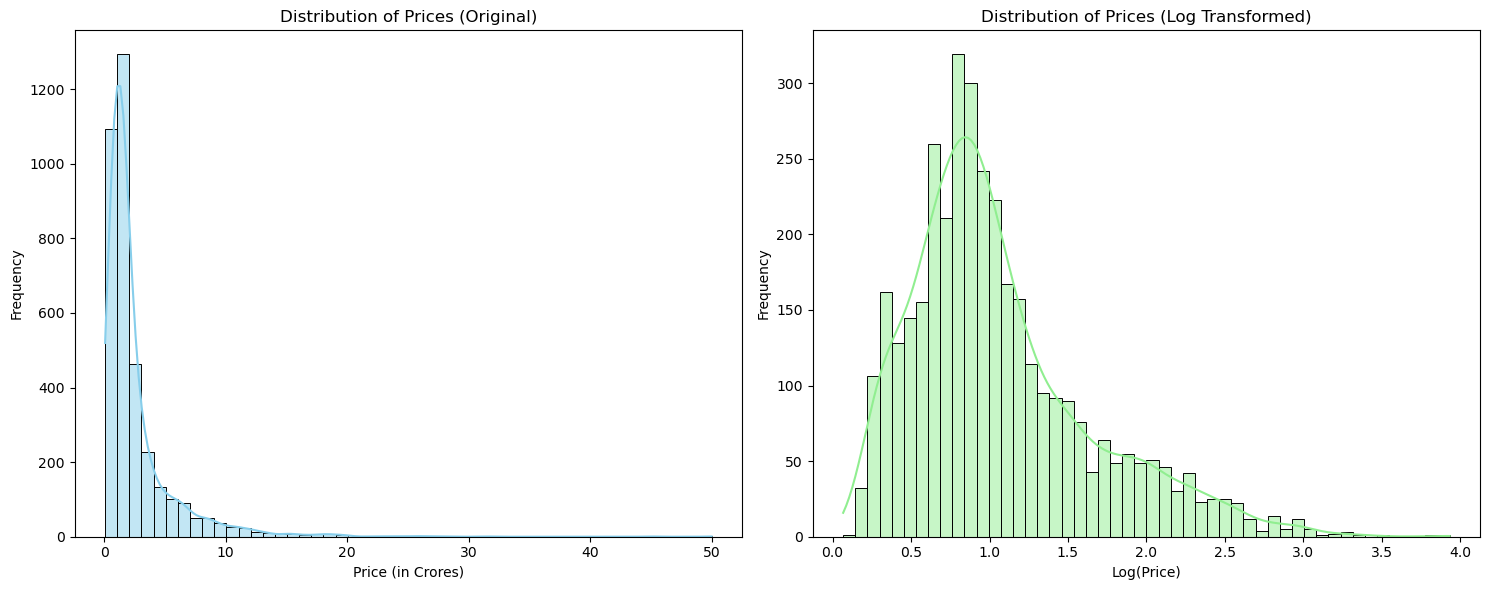

In [33]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

# price_per_sqft

In [34]:
df['price_per_sqft'].isnull().sum()

17

In [35]:
df['price_per_sqft'].describe()

count      3661.000000
mean      13890.629609
std       23207.224034
min           4.000000
25%        6815.000000
50%        9020.000000
75%       13878.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Count'>

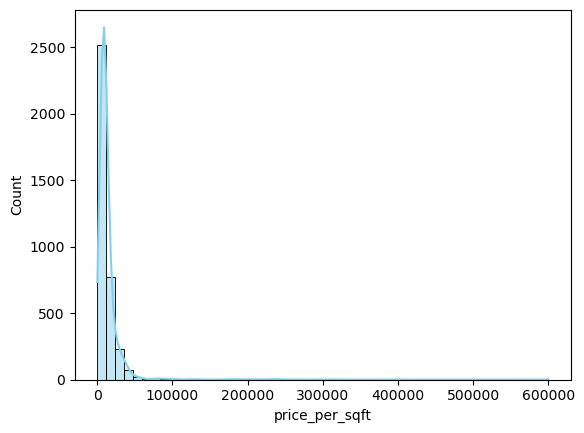

In [36]:
sns.histplot(df['price_per_sqft'], bins = 50, color= 'skyblue', kde= True)

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: >

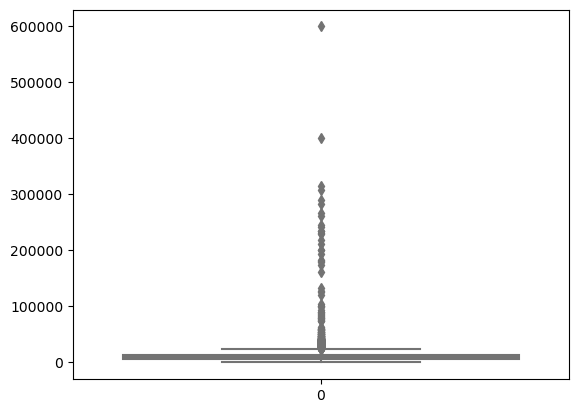

In [37]:
sns.boxplot(df['price_per_sqft'], color= 'lightgreen')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

**Observations**

- Potential Outliers
- Right Skewed
- 17 mising values

# bedRoom

In [38]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

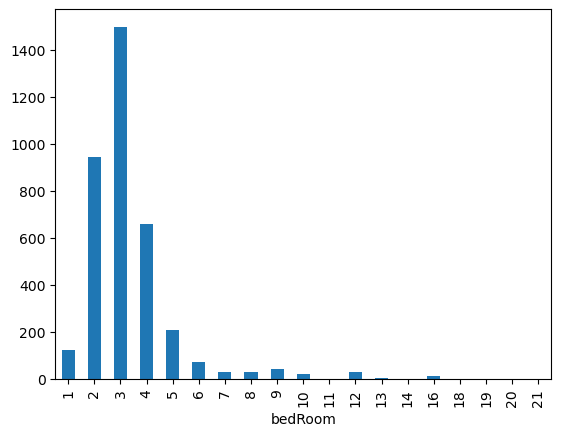

In [39]:
df['bedRoom'].value_counts().sort_index().plot(kind = 'bar')

<Axes: ylabel='proportion'>

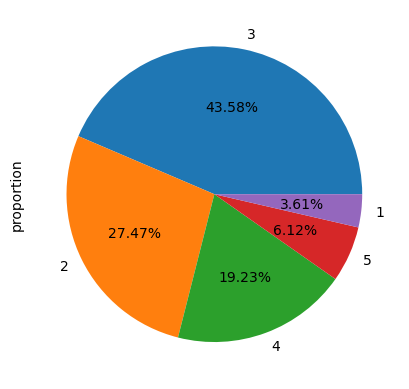

In [40]:
df['bedRoom'].value_counts(normalize= True).head().plot(kind = 'pie', autopct= '%0.2f%%' )

# bathroom

In [41]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

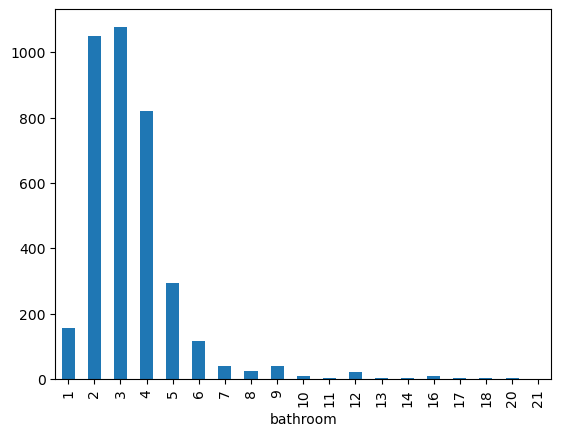

In [42]:
df['bathroom'].value_counts().sort_index().plot(kind = 'bar')

<Axes: ylabel='proportion'>

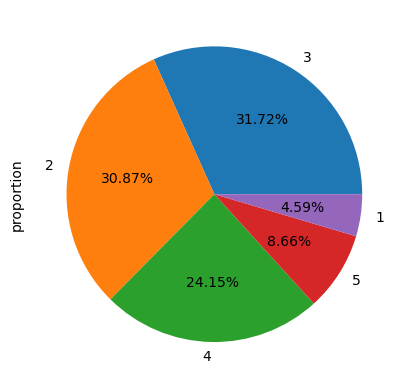

In [43]:
df['bathroom'].value_counts(normalize= True).head().plot(kind = 'pie', autopct= '%0.2f%%' )

# balcony

In [44]:
df['balcony'].isnull().sum()

0

<Axes: xlabel='balcony'>

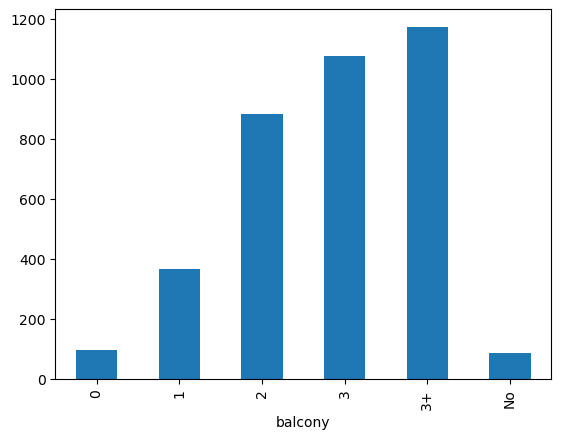

In [45]:
df['balcony'].value_counts().sort_index().plot(kind = 'bar')

<Axes: ylabel='proportion'>

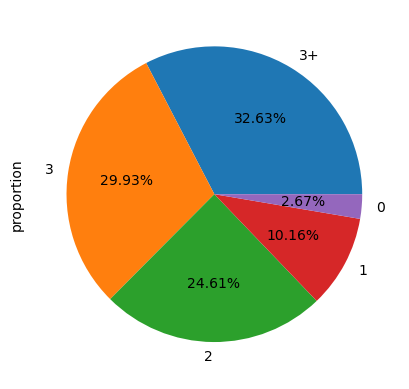

In [46]:
df['balcony'].value_counts(normalize= True).head().plot(kind = 'pie', autopct= '%0.2f%%' )

 # floornum


In [47]:
df.iloc[:, 10: ].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,10.0,South,Undefined,NaN,3534.0,2000.00,0,0,0,0,0,2,0
1,1.0,South,Relatively New,1050.0,950.0,850.00,0,0,0,0,0,1,174
2,14.0,East,Relatively New,1900.0,1305.0,1173.00,1,1,0,0,0,2,167
3,4.0,East,Relatively New,1650.0,NaN,1022.58,0,1,0,0,0,1,125
4,4.0,East,Undefined,NaN,1570.0,NaN,0,0,0,1,0,2,89


In [48]:
df['floorNum'].isnull().sum()

19

In [49]:
df['floorNum'].describe()

count    3659.000000
mean        6.797212
std         6.011960
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

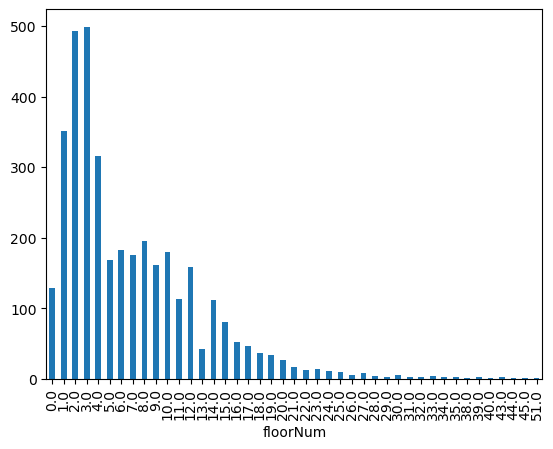

In [50]:
df['floorNum'].value_counts().sort_index().plot(kind = 'bar')

<Axes: >

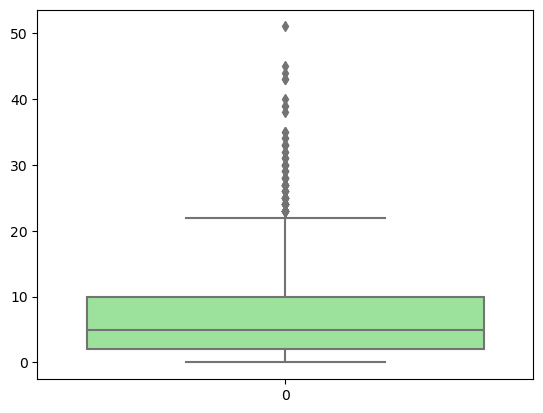

In [51]:
sns.boxplot(df['floorNum'], color = 'lightgreen')

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

# facing

In [52]:
df['facing'].isnull().sum()

1046

In [53]:
df['facing'].fillna('NA', inplace = True)

In [54]:
df['facing'].value_counts()

facing
NA            1046
East           623
North-East     623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

# agePossession

In [55]:
df['agePossession'].isnull().sum()

0

In [56]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           594
Moderately Old         563
Undefined              534
Old Property           303
Under Construction      38
Name: count, dtype: int64

# Super built up area

In [57]:
df['super_built_up_area'].isnull().sum()

1802

In [58]:
df['super_built_up_area'].describe()

count     1876.000000
mean      1924.936860
std        764.079429
min         89.000000
25%       1478.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='super_built_up_area', ylabel='Count'>

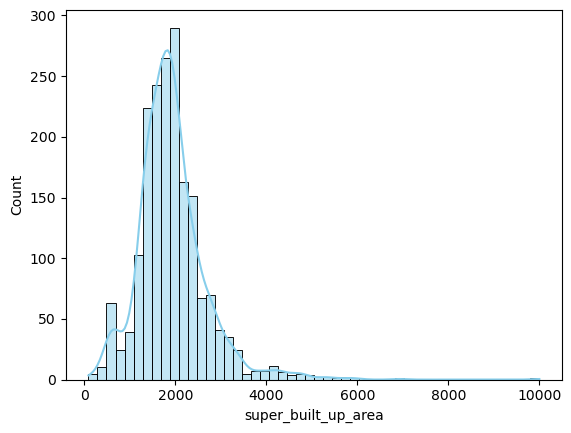

In [59]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color= 'skyblue', kde= True)

<Axes: xlabel='super_built_up_area'>

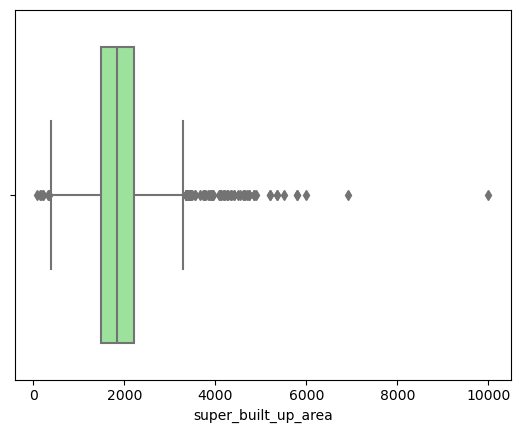

In [60]:
sns.boxplot(x=df['super_built_up_area'].dropna(), color='lightgreen')

- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- here are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

# built up area

In [61]:
df['built_up_area'].isnull().sum()

1988

In [62]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='built_up_area', ylabel='Count'>

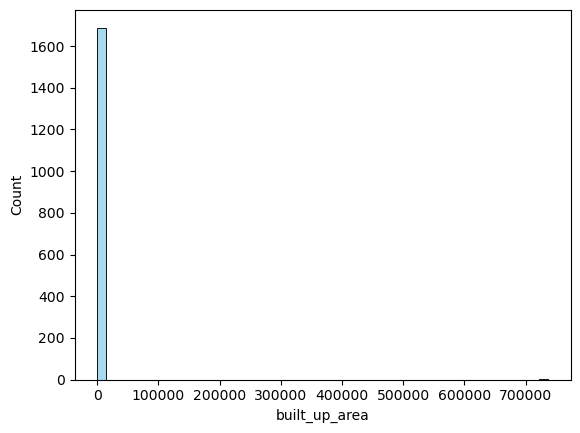

In [63]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color= 'skyblue', kde= False)

<Axes: >

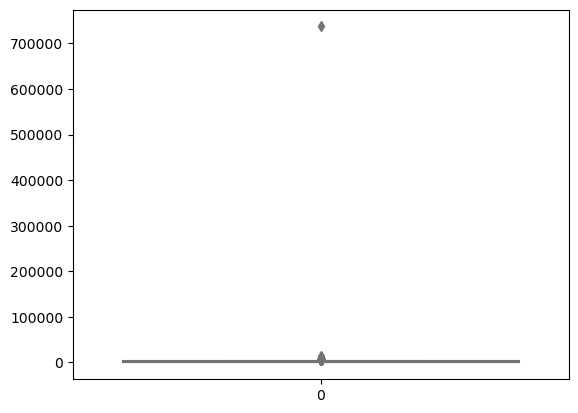

In [64]:
sns.boxplot(df['built_up_area'].dropna(), color='lightgreen')

In [65]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,0,0,0,0,2,0
1,0,0,0,0,0,1,174
2,1,1,0,0,0,2,167
3,0,1,0,0,0,1,125
4,0,0,0,1,0,2,89
...,...,...,...,...,...,...,...
3797,0,0,1,0,0,2,141
3798,0,0,0,0,1,1,13
3799,0,1,0,1,0,1,138
3800,1,1,0,1,0,1,160


# additional rooms

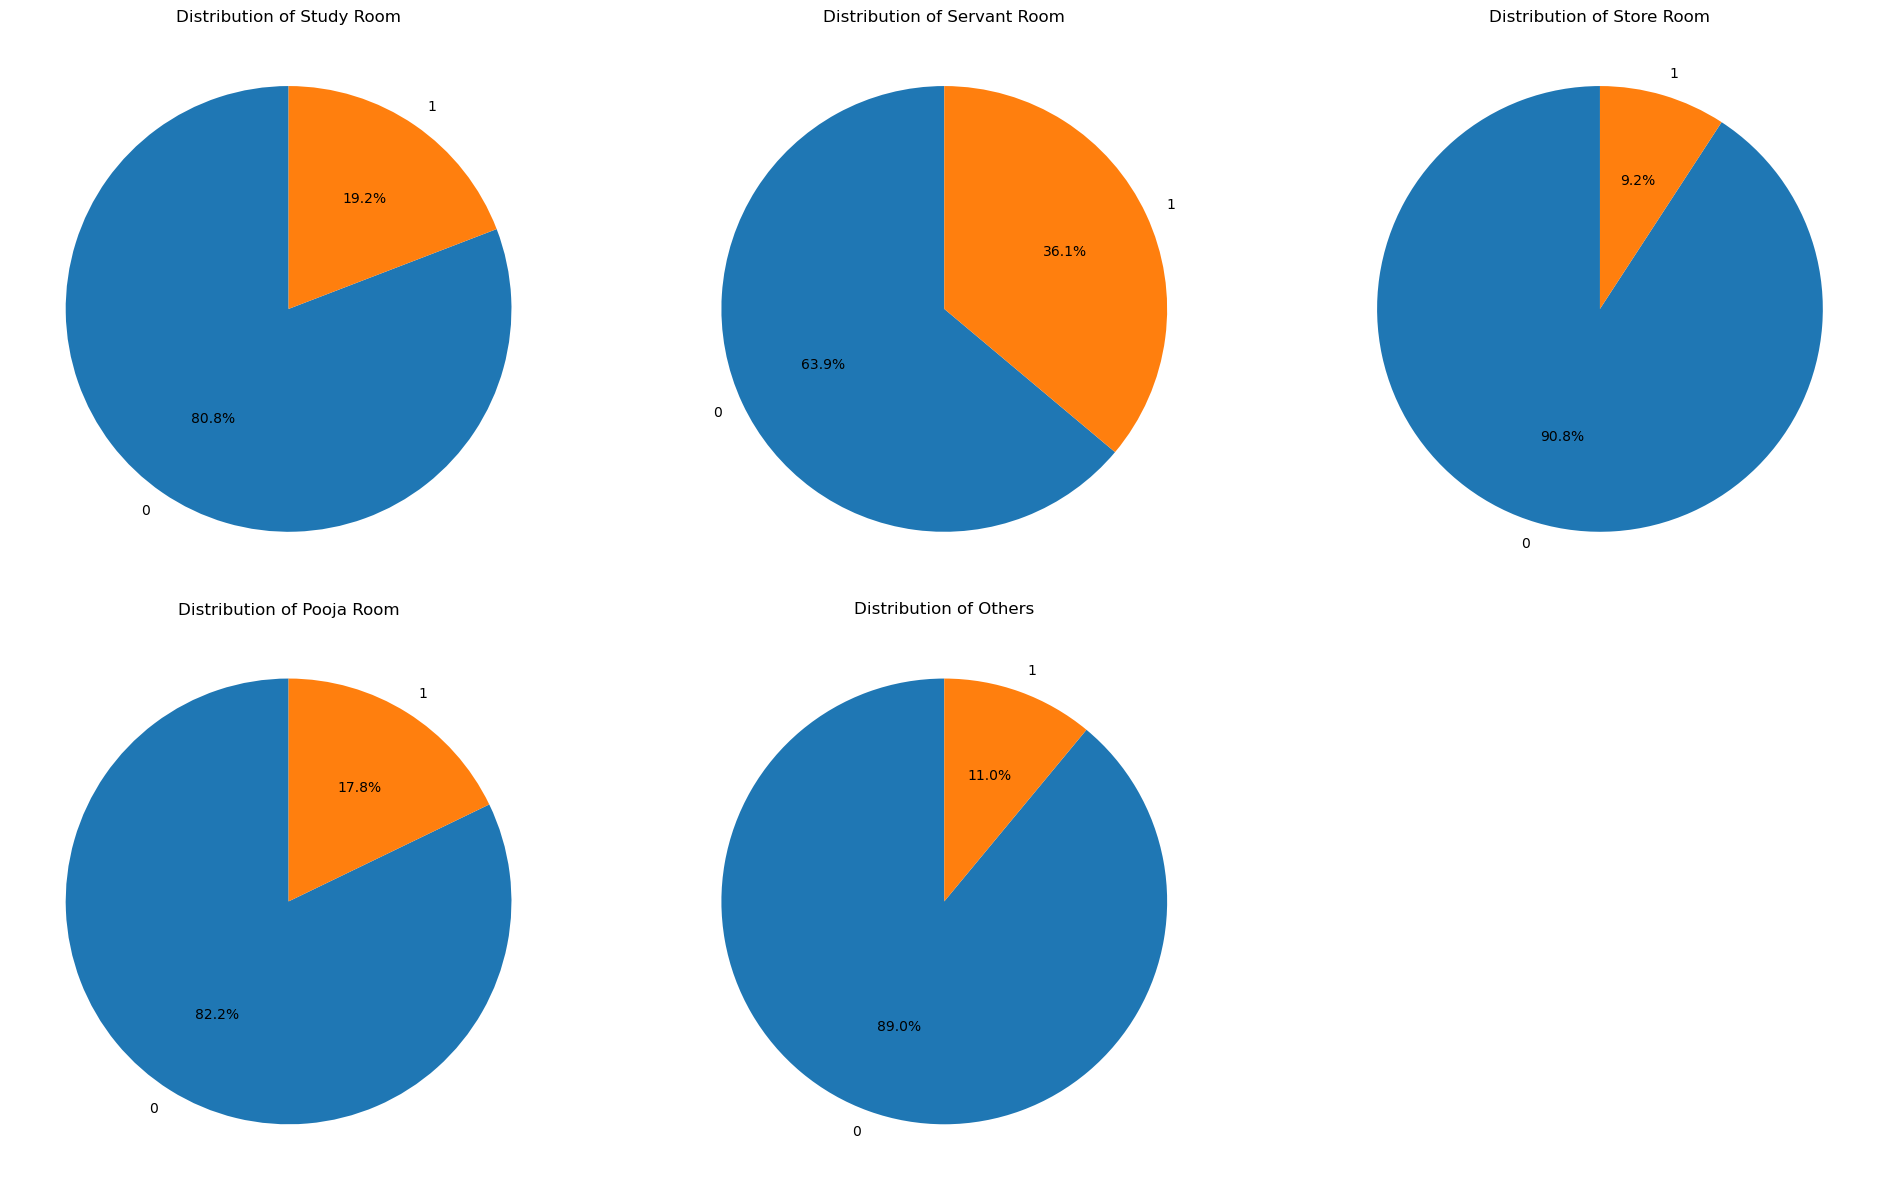

In [66]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()


# furnishing_type

In [67]:
df['furnishing_type'].value_counts()

furnishing_type
2    2405
1    1062
0     211
Name: count, dtype: int64

<Axes: ylabel='count'>

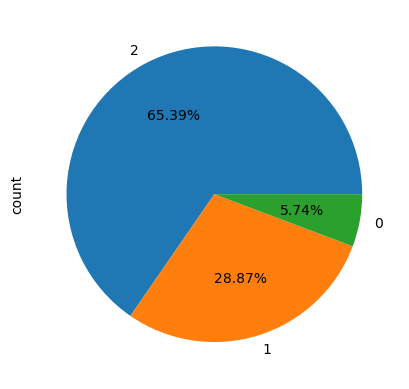

In [68]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

# luxury score

In [69]:
df['luxury_score'].isnull().sum()

0

In [70]:
df['luxury_score'].describe()

count    3678.000000
mean       71.416259
std        53.127117
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='luxury_score', ylabel='Count'>

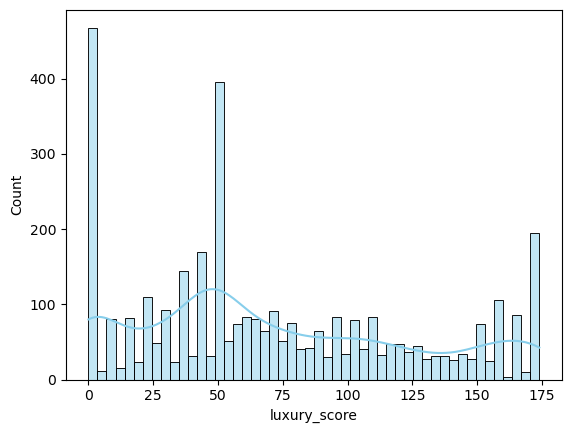

In [71]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: >

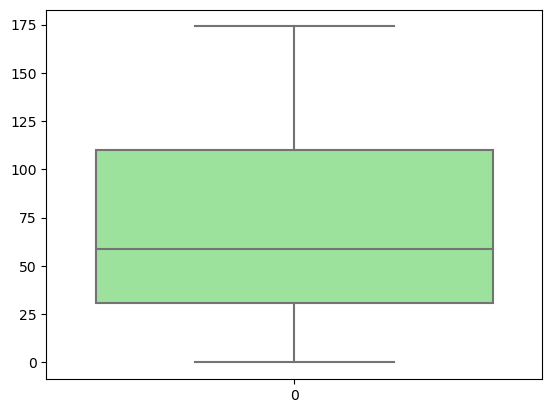

In [72]:
sns.boxplot(df['luxury_score'], color='lightgreen')